In [1]:
import numpy as np
import pandas as pd

## Analysis

In [2]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region_df.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [5]:
df = df.merge(region_df, on='NOC', how='left')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway',
       'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt',
       'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan',
       'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon',
       'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Virgin Islands, US', 'Sri Lanka',
       'Armenia', 'Ivory

In [7]:
# checking missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [8]:
# checking duplicate rows
df.duplicated().sum()

1385

In [10]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
# count medals in df
df['Medal'].value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [26]:
# encoding categorical variable Medal and concatinating with new dataframe
df = pd.concat([df, pd.get_dummies(df['Medal'])],axis=1)

In [41]:
df.shape

(269731, 20)

In [42]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0


In [43]:
# seeing medals based on region
df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,2638.0,1641.0,1358.0
1,Russia,1599.0,1170.0,1178.0
2,Germany,1301.0,1195.0,1260.0
3,UK,677.0,739.0,651.0
4,Italy,575.0,531.0,531.0
...,...,...,...,...
200,Honduras,0.0,0.0,0.0
201,Guyana,0.0,0.0,1.0
202,Guinea-Bissau,0.0,0.0,0.0
203,Guinea,0.0,0.0,0.0


In [45]:
# medals data in inconsistent because if a team won medal every athlete in that team have a model in the dataset
# so remove repetitions based on team, NOC, games, year, season and city
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'])

In [46]:
# grouping corrected data based on region and sorting the data based on golds
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_tally

,region,Gold,Silver,Bronze
0,USA,1131.0,901.0,792.0
1,Russia,727.0,600.0,589.0
2,Germany,580.0,592.0,597.0
3,UK,289.0,321.0,312.0
4,France,265.0,287.0,334.0
...,...,...,...,...
200,Honduras,0.0,0.0,0.0
201,Guyana,0.0,0.0,1.0
202,Guinea-Bissau,0.0,0.0,0.0
203,Guinea,0.0,0.0,0.0


In [47]:
# a new column "total"
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1131.0,901.0,792.0,2824.0
1,Russia,727.0,600.0,589.0,1916.0
2,Germany,580.0,592.0,597.0,1769.0
3,UK,289.0,321.0,312.0,922.0
4,France,265.0,287.0,334.0,886.0
...,...,...,...,...,...
200,Honduras,0.0,0.0,0.0,0.0
201,Guyana,0.0,0.0,1.0,1.0
202,Guinea-Bissau,0.0,0.0,0.0,0.0
203,Guinea,0.0,0.0,0.0,0.0


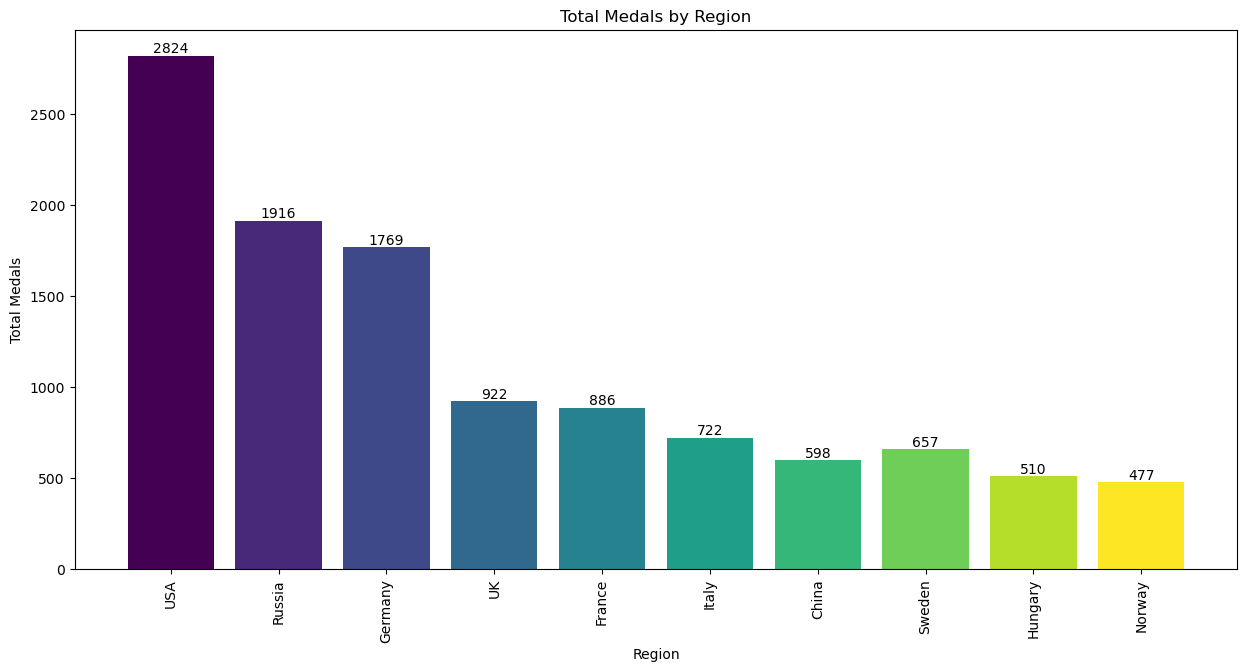

In [51]:
import matplotlib.pyplot as plt
top_ten_total = medal_tally.head(10)

# Create a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(top_ten_total)))

# Plotting the total medals by region
plt.figure(figsize=(15, 7))
bars = plt.bar(top_ten_total['region'], top_ten_total['total'], color=colors)
plt.xlabel('Region')
plt.ylabel('Total Medals')
plt.title('Total Medals by Region')
plt.xticks(rotation=90)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.show()

## Prediction

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [88]:
data = pd.read_csv("athlete_events.csv")

# cleaning
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)
data = data.drop(['ID', 'Name', 'Games'], axis=1)
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(int))

data.isna().mean()

Sex       0.0
Age       0.0
Height    0.0
Weight    0.0
Team      0.0
NOC       0.0
Year      0.0
Season    0.0
City      0.0
Sport     0.0
Event     0.0
Medal     0.0
dtype: float64

In [89]:
# binary encode
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [90]:
# onhot encode
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [91]:
# encoding categorical values
data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

In [92]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,178,75,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,181,79,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29,179,89,1976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30,185,96,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# spilting in target and features
y = data['Medal']
X = data.drop('Medal', axis=1)

In [94]:
# feature selection using selectkbest
best = SelectKBest(score_func=chi2, k=10)
fit = best.fit(X,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [120]:
# joining the above dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(7,'Score'))

              Feature        Score
3              Weight  6918.210040
1404            N_URS  3912.466445
982    T_Soviet Union  3875.363234
1406            N_USA  3490.799425
1101  T_United States  3025.609256
2              Height  1475.570949
1505         S_Rowing  1457.130819


In [119]:
# selecting features
features=scores["Feature"].tolist()[:6]
features

['Sex', 'Age', 'Height', 'Weight', 'Year', 'Season']

In [121]:
# a new dataset with the above features
data=data[['Age','Sex','Height','Weight','Year','Season', 'Medal']]
data

,Age,Sex,Height,Weight,Year,Season,Medal
0,24,1,180,80,1992,1,0
1,23,1,170,60,2012,1,0
2,24,1,178,75,1920,1,0
3,34,1,181,79,1900,1,1
4,21,0,185,82,1988,0,0
...,...,...,...,...,...,...,...
271111,29,1,179,89,1976,0,0
271112,27,1,176,59,2014,0,0
271113,27,1,176,59,2014,0,0
271114,30,1,185,96,1998,0,0


In [122]:
y = data['Medal']
X = data.drop(['Medal'], axis=1)

# data spiting in traing and testing
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [123]:
# scaling 

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

### Predictive modelling and comparing models

In [124]:
# logistic regression

algo1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("lr_accuracy",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confusion matrix
[[92551    26]
 [15855    15]]


lr_accuracy 85.35598034062721 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     92577
           1       0.37      0.00      0.00     15870

    accuracy                           0.85    108447
   macro avg       0.61      0.50      0.46    108447
weighted avg       0.78      0.85      0.79    108447



In [125]:
# random forest

algo2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=10,max_depth=15)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("rf_accuracy:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confusion matrix
[[92220   357]
 [11785  4085]]


rf_accuracy: 88.80374745267274 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     92577
           1       0.92      0.26      0.40     15870

    accuracy                           0.89    108447
   macro avg       0.90      0.63      0.67    108447
weighted avg       0.89      0.89      0.86    108447



In [126]:
# checking models

result = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest'], 
                         'Accuracy': [lr_acc_score*100, rf_acc_score*100]})
result

,Model,Accuracy
0,Logistic Regression,85.355980
1,Random Forest,88.803747


### Random forest model final

In [140]:
model = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
model.fit(train_x,train_y)
predicted = model.predict(test_x)
accuracy = accuracy_score(test_y, rf_predicted)
print("Accuracy of Random Forest:",accuracy*100,'\n')

Accuracy of Random Forest: 88.80374745267274 



In [146]:
X.columns

Index(['Age', 'Sex', 'Height', 'Weight', 'Year', 'Season'], dtype='object')

In [148]:
def predict_outcome(age, sex, height, weight, year, season):
    # Prepare the input data
    if sex == 'Male':
        sex = 1
    else:
        sex = 0
    if season == 'Summer':
        season = 1
    else:
        season = 0
    input_data = np.array([[age, sex, height, weight, year, season]])
    
    # Scale the input data
    scaled_input = scaler.transform(input_data)
    
    # Make the prediction
    prediction = model.predict(scaled_input)
    
    return prediction[0]

result = predict_outcome(26, 'Male', 185, 82, 2024, 'Summer')
print(result)


0


C:\Users\romya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
